Loading the model...
Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


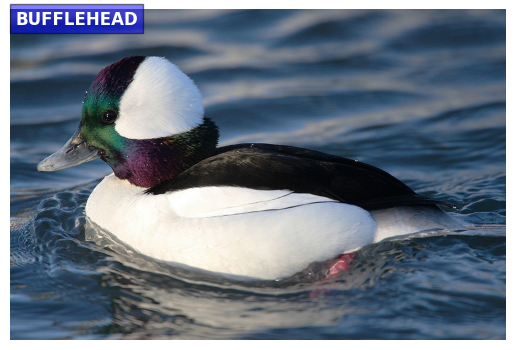

In [11]:
import tensorflow as tf
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

warnings.filterwarnings("ignore")

class_names = pd.read_csv('bird_data/class_labels.csv')

class_names = class_names["label"].tolist()

test_image_path = 'cnn_test_images/bufflehead.jpg'

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# Function to preprocess the image and make predictions
def preprocess_image_and_predict(model, img_path, class_names):
    # Preprocess the image
    img_array = preprocess_image(img_path)
    
    # Make predictions
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class_label = class_names[predicted_class_index]
    
    return predicted_class_index, predicted_class_label



print("Loading the model...")

model_path = 'models/cnn_final.keras'

try:
    loaded_model = tf.keras.models.load_model(model_path)
    print("Model loaded successfully.")
except Exception as e:
    print("Error loading the model:", e)


# Get the predicted class index and label
predicted_class_index, predicted_class_label = preprocess_image_and_predict(loaded_model, test_image_path, class_names)

# Load and display the image
img = image.load_img(test_image_path)
plt.imshow(img)
plt.axis('off')

# Add the predicted class label as text
plt.text(10, 30, f'{predicted_class_label}', color='white', fontsize=12, fontweight='bold', bbox=dict(facecolor='blue', alpha=0.5))

plt.show()